Cluster-wise Mean of Features:
          sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                 5.801887          2.673585           4.369811   
1                 5.006000          3.428000           1.462000   
2                 6.780851          3.095745           5.510638   

         petal width (cm)  
Cluster                    
0                1.413208  
1                0.246000  
2                1.972340  


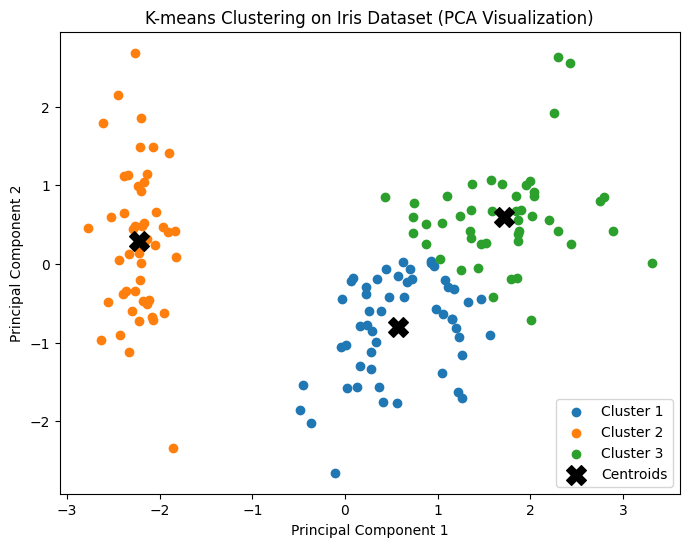

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 3 
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

df = pd.DataFrame(X, columns=iris.feature_names)
df['Cluster'] = labels
cluster_summary = df.groupby("Cluster").mean()
print("Cluster-wise Mean of Features:\n", cluster_summary)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i+1}')
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', marker='X', s=200, label='Centroids')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clustering on Iris Dataset (PCA Visualization)")
plt.legend()
plt.show()
